# One sample

In [2]:
import numpy as np
import tensorflow as tf

# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

# shuffle
inds = np.arange(N)
np.random.shuffle(inds)

X = X[inds]
y = y[inds]

print(X[:5])
print(y[:5])

[[1.  5.1 3.4 1.5 0.2]
 [1.  5.2 3.5 1.5 0.2]
 [1.  5.6 2.5 3.9 1.1]
 [1.  6.1 2.8 4.7 1.2]
 [1.  4.3 3.  1.1 0.1]]
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]]


In [3]:
# theta
theta = tf.Variable([[0.0],
                     [0.0], 
                     [0.0], 
                     [0.0], 
                     [0.0]], dtype=tf.float64)
 
# forward
def compute_output(theta, X):
    return tf.math.sigmoid(tf.transpose(theta)@X)

In [4]:
# parameters
lr = 0.1
num_epochs = 50
loss_fn = tf.keras.losses.BinaryCrossentropy()

losses = []

In [5]:
# training
for epoch in range(num_epochs):
    for x_data, y_data in zip(X, y):
        # reshape -> (5,1)
        x_data = tf.reshape(x_data, (-1,1))
        
        with tf.GradientTape() as t:
            # y_hat
            y_hat = compute_output(theta, x_data)
            
            # loss
            loss = loss_fn(y_data, y_hat)
            
        losses.append(loss.numpy())            

        # gradient
        dtheta = t.gradient(loss, theta)

        # update
        theta.assign_sub(lr*dtheta)

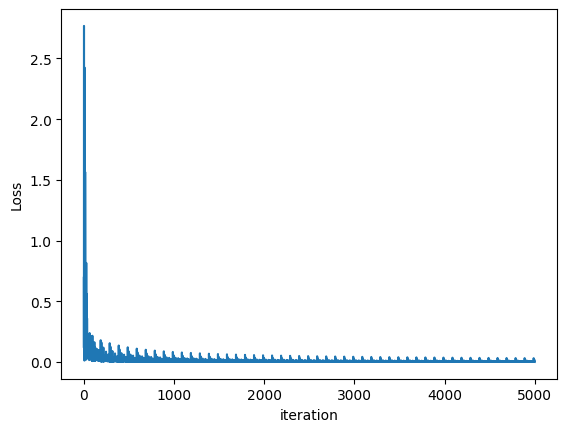

In [6]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

# N samples

In [7]:
import numpy as np
import tensorflow as tf

# Data preparation
data = np.genfromtxt('iris_full.csv', 
                     delimiter=',', 
                     skip_header=1)
X = data[:,0:4]
y = data[:,4:]
N = X.shape[0]

X = np.c_[np.ones((N, 1)), X]

print(X[:10])

[[1.  5.1 3.5 1.4 0.2]
 [1.  4.9 3.  1.4 0.2]
 [1.  4.7 3.2 1.3 0.2]
 [1.  4.6 3.1 1.5 0.2]
 [1.  5.  3.6 1.4 0.2]
 [1.  5.4 3.9 1.7 0.4]
 [1.  4.6 3.4 1.4 0.3]
 [1.  5.  3.4 1.5 0.2]
 [1.  4.4 2.9 1.4 0.2]
 [1.  4.9 3.1 1.5 0.1]]


In [8]:
# theta
theta = tf.Variable([[0.0],
                     [0.0], 
                     [0.0], 
                     [0.0], 
                     [0.0]], dtype=tf.float64)
 
# forward
def compute_output(theta, X):
    return tf.math.sigmoid(X@theta)

In [9]:
# parameters
lr = 0.01
num_epochs = 1000
loss_fn = tf.keras.losses.BinaryCrossentropy()

losses = []

In [10]:
# training
for epoch in range(num_epochs):
    with tf.GradientTape() as t:
        # y_hat
        y_hat = compute_output(theta, X)
        
        # loss
        loss = loss_fn(y, y_hat)
        
    losses.append(loss.numpy())

    # gradient
    dtheta = t.gradient(loss, theta)

    # update
    theta.assign_sub(lr*dtheta)

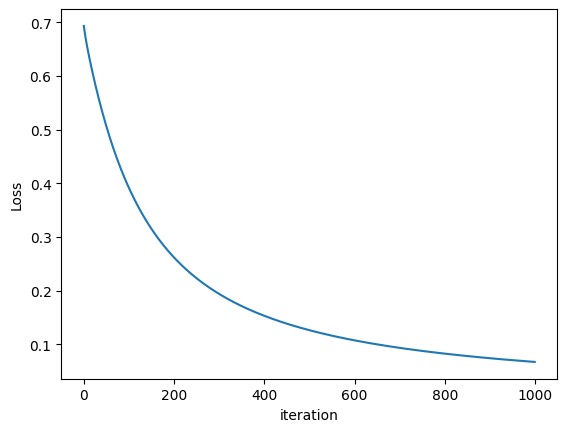

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.show()

In [12]:
y_hat = compute_output(theta, X)
print(y_hat)

tf.Tensor(
[[0.05211472]
 [0.08926149]
 [0.06694796]
 [0.10136426]
 [0.04848641]
 [0.05810549]
 [0.070036  ]
 [0.06860688]
 [0.11136886]
 [0.08819396]
 [0.0458949 ]
 [0.083802  ]
 [0.08602441]
 [0.06289732]
 [0.01907302]
 [0.02385014]
 [0.03151724]
 [0.0556199 ]
 [0.05545826]
 [0.04810888]
 [0.08303922]
 [0.05668503]
 [0.02922447]
 [0.11856102]
 [0.12874473]
 [0.11596426]
 [0.09023234]
 [0.05901107]
 [0.05599857]
 [0.10387671]
 [0.11116572]
 [0.07017942]
 [0.03036061]
 [0.0231102 ]
 [0.08819396]
 [0.05318288]
 [0.04015899]
 [0.08819396]
 [0.08778214]
 [0.06681975]
 [0.04909918]
 [0.17215019]
 [0.07245255]
 [0.09300358]
 [0.09307765]
 [0.09747712]
 [0.05245636]
 [0.07970635]
 [0.04715066]
 [0.06513844]
 [0.9514855 ]
 [0.94760096]
 [0.97061222]
 [0.95896605]
 [0.96904592]
 [0.96684386]
 [0.96112079]
 [0.86891477]
 [0.95982878]
 [0.93866536]
 [0.9308648 ]
 [0.9407839 ]
 [0.94823073]
 [0.97190998]
 [0.86504127]
 [0.93617865]
 [0.96544796]
 [0.93104388]
 [0.98191858]
 [0.9319519 ]
 [0.97640